# Laboratorul 9

Rezolvați exercițiile din îndrumarul PDF. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import dictlearn

In [2]:
p = 8           # dimensiunea unui patch (numar de pixeli)
s = 6           # sparsitatea
N = 1000        # numarul total de patch-uri
n = 256         # numarul de atomi din dictionar
K = 50          # numarul de iteratii DL
sigma = 0.075   # deviatia standard a zgomotului

Dimensiunea originală a lui Ynoisy: (255025, 8, 8)
Dimensiunea lui Ynoisy după vectorizare: (255025, 64)


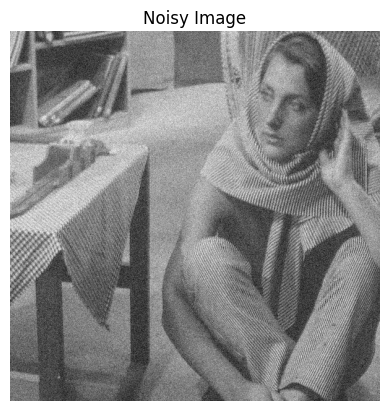

In [24]:
from sklearn.feature_extraction.image import extract_patches_2d
from matplotlib import image as mpimg
# exercitiul 1
# (a) Încărcarea imaginii
I = mpimg.imread('barbara.png')
if I.dtype != np.float32:
    I = I / 255.0

# (b) Adăugarea zgomotului
Inoisy = I + sigma * np.random.randn(*I.shape)

# (c) Extragerea patch-urilor
Ynoisy = extract_patches_2d(Inoisy, (p, p))

# Ajustarea dimensiunilor și vectorizarea patch-urilor
print("Dimensiunea originală a lui Ynoisy:", Ynoisy.shape)
Ynoisy = Ynoisy.reshape(Ynoisy.shape[0], -1)
print("Dimensiunea lui Ynoisy după vectorizare:", Ynoisy.shape)

# Normalizarea datelor
Ynoisy = Ynoisy.T
mean_patches = np.mean(Ynoisy, axis=0)
Ynoisy -= mean_patches

# (d) Selectarea patch-urilor
indices = np.random.choice(Ynoisy.shape[1], N, replace=False)
Y = Ynoisy[:, indices]

plt.imshow(Inoisy, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')
plt.show()

In [32]:
from dictlearn import DictionaryLearning
from sklearn.preprocessing import normalize
# exercitiul 2
# (a) Generarea și normalizarea dicționarului inițial D0
D0 = np.random.randn(p*p, n)
D0 = normalize(D0, axis=0, norm='l2')

# (b) Antrenarea dicționarului
dl = DictionaryLearning(n_components=n,max_iter=K,fit_algorithm='ksvd'
                        ,n_nonzero_coefs=s,code_init=None,dict_init=D0
                        ,params=None,data_sklearn_compat=False)
dl.fit(Y)
D = dl.D_

print("Dimensiunea Ynoisy:", Ynoisy.shape)
print("Dimensiunea D:", D.shape)

print("Dicționarul a fost antrenat.")

Dimensiunea Ynoisy: (64, 255025)
Dimensiunea D: (64, 256)
Dicționarul a fost antrenat.


In [33]:
from dictlearn import methods
# exercitiul 3
Xc, err = methods.omp(Ynoisy, D, n_nonzero_coefs=s)



In [34]:
from sklearn.feature_extraction.image import reconstruct_from_patches_2d
# am separat partea asta de cealalta pentru ca dureaza prea mult

Yc = np.matmul(D, Xc) + mean_patches

# c
Yc = Yc.reshape((8, 8, Yc.shape[1]))
Yc = np.transpose(Yc, (2, 0, 1))

# d
Ic = reconstruct_from_patches_2d(Yc, (I.shape[0], I.shape[1]))


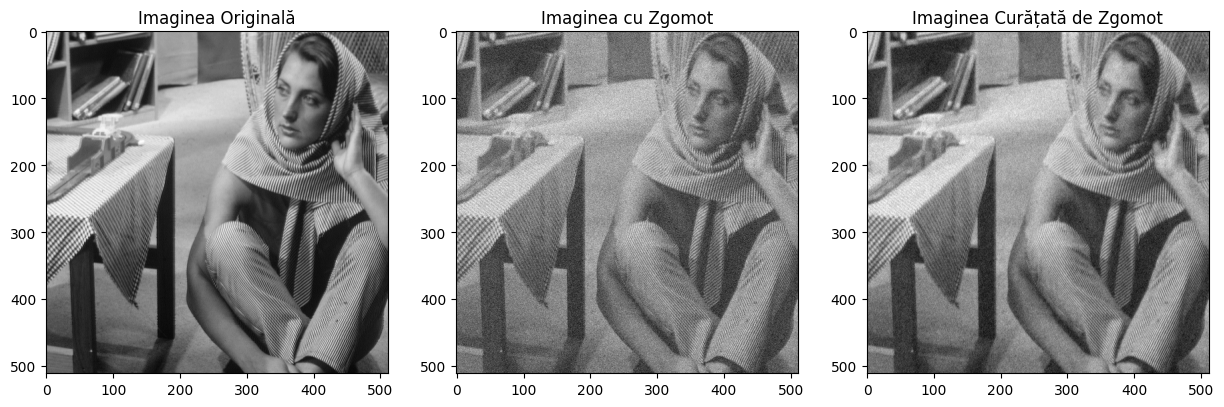

PSNR între Imaginea Originală și cea cu Zgomot: 22.52 dB
PSNR între Imaginea Originală și cea Curățată de Zgomot: 26.98 dB


In [36]:
# exercitiul 4
def psnr(img1, img2):
    """Calculează PSNR între două imagini."""
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 1.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# (a) Vizualizarea imaginilor
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(I, cmap='gray')
plt.title("Imaginea Originală")
plt.subplot(1, 3, 2)
plt.imshow(Inoisy, cmap='gray')
plt.title("Imaginea cu Zgomot")
plt.subplot(1, 3, 3)
plt.imshow(Ic, cmap='gray')
plt.title("Imaginea Curățată de Zgomot")
plt.show()

# (b) Calculul PSNR
psnr_noisy = psnr(I, Inoisy)
psnr_denoised = psnr(I, Ic)

print(f"PSNR între Originală și cea cu Zgomot: {psnr_noisy:.2f} dB")
print(f"PSNR între Imaginea Originală și cea Curățată de Zgomot: {psnr_denoised:.2f} dB")
